Design adaboost (can use scikit-learn)

There are 1257 samples in the training dataset.


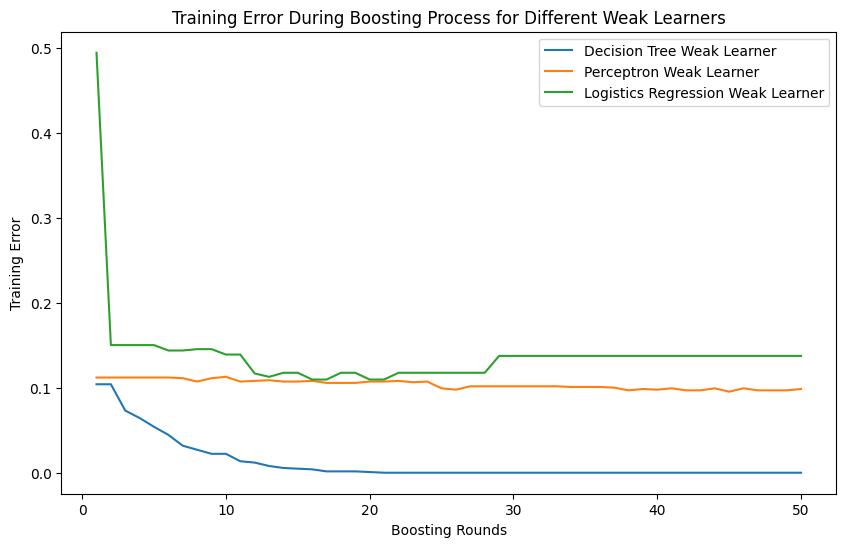

Test Error for Decision Tree Weak Learner: 0.0204
Test Error for Perceptron Weak Learner: 0.0852
Test Error for Logistic Regression Weak Learner: 0.1111


In [ ]:
from os import X_OK
from sklearn import datasets
from sklearn.linear_model import Perceptron
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import numpy as np
from matplotlib import pyplot as plt

# Load the digits dataset
digits = datasets.load_digits()
X, y = digits.data, digits.target

y = np.where(y % 2 == 0, 1, -1)
# Make binary. Even = 1, Odd = -1

X = X / 255.0  # Normalize

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

m = X_train.shape[0]

print(f"There are {m} samples in the training dataset.")

def ada_boost(X, y, T, learner="DT"):
    D = np.ones(m) / m
    C = []  # classifiers
    A = []  # alpha values
    training_errors = []  # To track training errors

    for t in range(T):
        if learner == "DT":
            weak_learner = DecisionTreeClassifier(max_depth=3)
        elif learner == "Log":
            weak_learner = LogisticRegression()
        else:
            weak_learner = Perceptron(max_iter=3, tol=None)
        weak_learner.fit(X, y, sample_weight=D)
        h = weak_learner.predict(X)

        incorrect = (h != y)
        error = np.sum(D * incorrect) / np.sum(D)

        if error == 0:
            a = 1
            C.append(weak_learner)
            A.append(a)
            break

        a = 0.5 * np.log((1 - error) / error)

        D = D * np.exp(-a * y * h)
        D /= np.sum(D)  # Normalize the weights

        C.append(weak_learner)
        A.append(a)

        H = np.sign(sum(alpha * clf.predict(X) for alpha, clf in zip(A, C)))
        training_error = np.mean(H != y)

        training_errors.append(training_error)

    def strong_classifier(X_new):
        final_prediction = np.sign(sum(alpha * clf.predict(X_new) for alpha, clf in zip(A, C)))
        return final_prediction

    return strong_classifier, training_errors

# Train AdaBoost with Decision Tree Weak Learners
strong_clf_tree, training_errors_tree = ada_boost(X_train, y_train, 50, learner="DT")

# Train AdaBoost with Perceptron Weak Learners
strong_clf_p, training_errors_p = ada_boost(X_train, y_train, 50, learner="P")

# Train Adaboost for logreg:
strong_clf_log, training_errors_log = ada_boost(X_train, y_train, 50, learner="Log")

# Plot training errors for both classifiers
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(training_errors_tree) + 1), training_errors_tree, label='Decision Tree Weak Learner')
plt.plot(range(1, len(training_errors_p) + 1), training_errors_p, label='Perceptron Weak Learner')
plt.plot(range(1, len(training_errors_log) + 1), training_errors_log, label='Logistics Regression Weak Learner')
plt.xlabel('Boosting Rounds')
plt.ylabel('Training Error')
plt.title('Training Error During Boosting Process for Different Weak Learners')
plt.legend()
plt.show()

# Evaluate the classifiers on the test set
y_pred_tree = strong_clf_tree(X_test)
y_pred_p = strong_clf_p(X_test)
y_pred_log = strong_clf_log(X_test)

test_error_tree = np.mean(y_pred_tree != y_test)
test_error_p = np.mean(y_pred_p != y_test)
test_error_log = np.mean(y_pred_log != y_test)

print(f"Test Error for Decision Tree Weak Learner: {test_error_tree:.4f}")
print(f"Test Error for Perceptron Weak Learner: {test_error_p:.4f}")
print(f"Test Error for Logistic Regression Weak Learner: {test_error_log:.4f}")


Test on mnist digits data: using a classifyer: even/odd, prime/notprime, etc using a weak learner and using a decision tree classifyer. We will also use knn to compare

Plot the training error with and without boosting, and determine which one learner is better.